In [ ]:
# Install any necessary libraries (if not already installed)
!pip install pandas numpy scikit-learn matplotlib seaborn

# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Optional: To display plots within the notebook
%matplotlib inline


In [ ]:
# Load the dataset
# Assuming you have uploaded the file to Colab or it's available via a URL.
# If you upload the file, replace 'path_to_housing_data.csv' with the correct path.

housing_data = pd.read_csv('/content/sample_data/Housing.csv')

# Display the first few rows of the dataset
housing_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Data Exploration and Cleaning

# Check for missing values
missing_values = housing_data.isnull().sum()

# Display the number of missing values for each column
print("Missing Values:\n", missing_values)

# Check data types and basic statistics
data_info = housing_data.info()
data_description = housing_data.describe()

# Display data types and descriptive statistics
print("\nData Types:\n", data_info)
print("\nDescriptive Statistics:\n", data_description)


Missing Values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 

In [ ]:
!pip install scipy

In [ ]:
from scipy import stats

# Calculate z-scores of the numerical features
z_scores = np.abs(stats.zscore(housing_data.select_dtypes(include=[np.number])))

# Set a threshold for identifying outliers
threshold = 3
outliers = np.where(z_scores > threshold)

# Count the number of outliers
num_outliers = len(outliers[0])

# Print the number of outliers detected
print(f"Number of outliers detected: {num_outliers}")

# Remove outliers from the dataset
housing_data_no_outliers = housing_data[(z_scores < threshold).all(axis=1)]

# Display the shape of the dataset before and after outlier removal
print("Original dataset shape:", housing_data.shape)
print("Dataset shape after outlier removal:", housing_data_no_outliers.shape)


Number of outliers detected: 26
Original dataset shape: (545, 13)
Dataset shape after outlier removal: (522, 13)


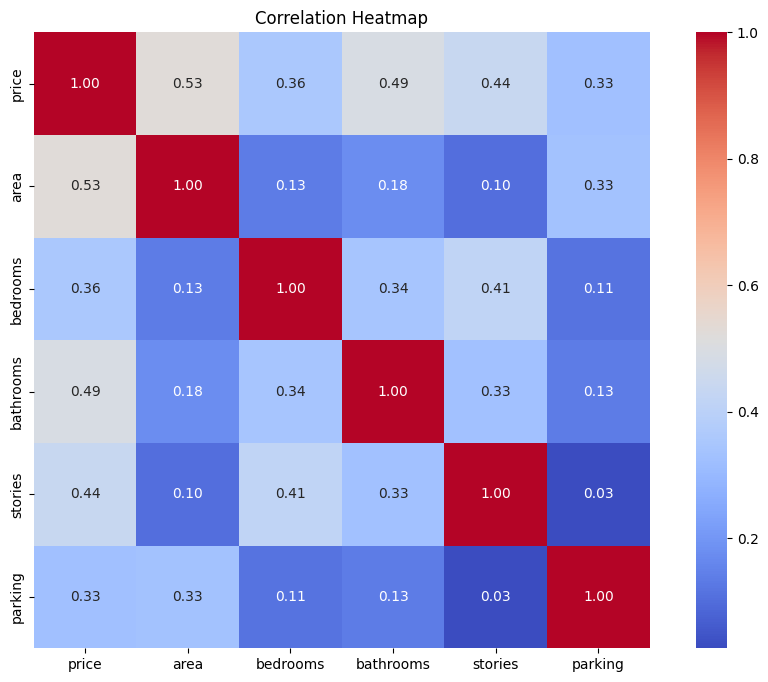

In [ ]:
# Assuming housing_data_no_outliers is your DataFrame
# Select only numerical features for correlation analysis
numerical_features = housing_data_no_outliers.select_dtypes(include=np.number).columns
correlation_matrix = housing_data_no_outliers[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



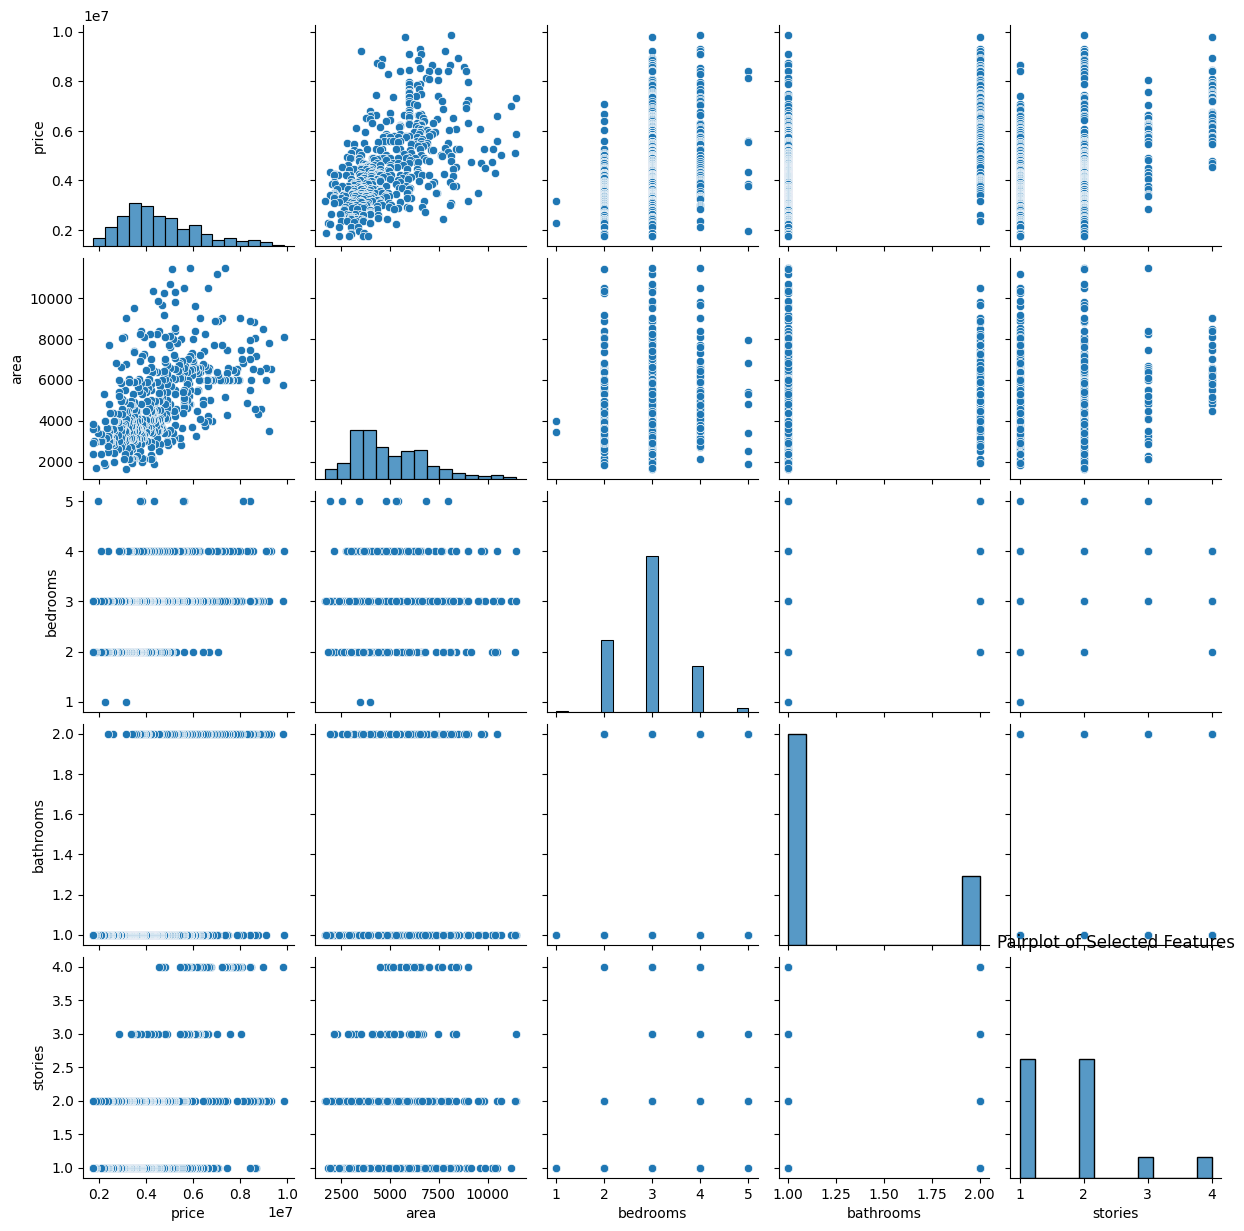

In [ ]:
# Pairplot for some selected features
selected_features = ['price', 'area', 'bedrooms', 'bathrooms', 'stories']
sns.pairplot(housing_data_no_outliers[selected_features]) # Assuming these are numerical
plt.title('Pairplot of Selected Features')
plt.show()

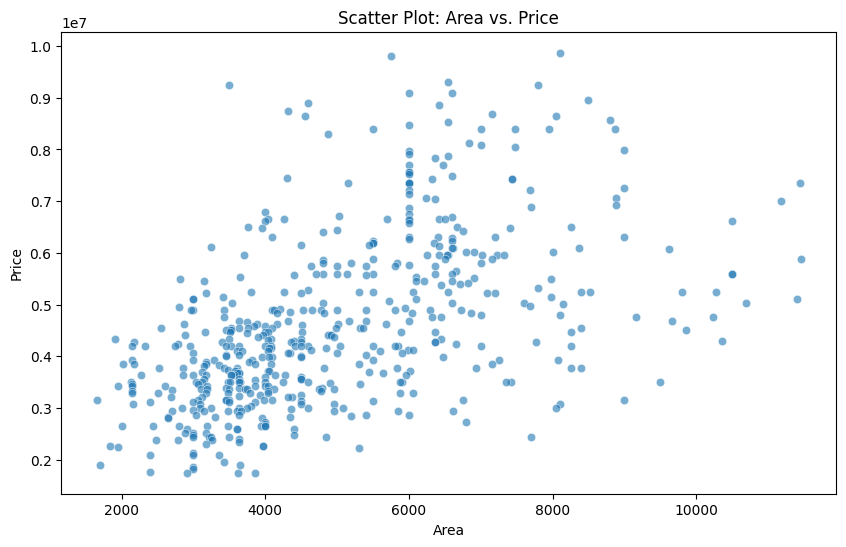

In [ ]:
# Scatter Plot for area vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=housing_data_no_outliers, x='area', y='price', alpha=0.6)
plt.title('Scatter Plot: Area vs. Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

<Figure size 1200x800 with 0 Axes>

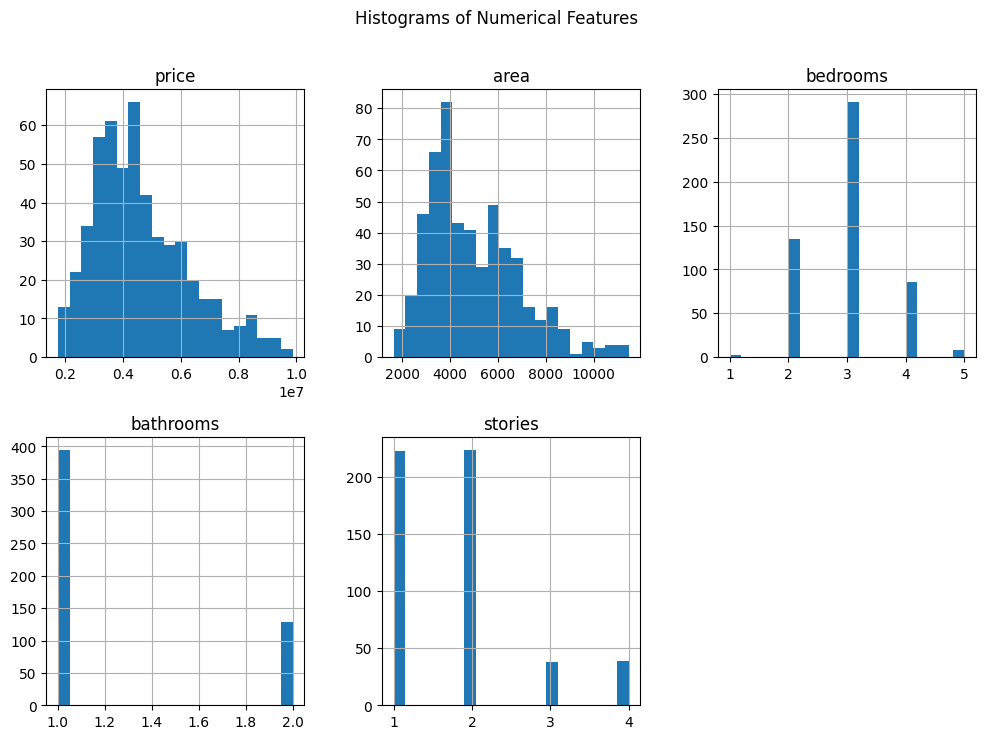

In [ ]:
# Histograms for numerical features
plt.figure(figsize=(12, 8))
housing_data_no_outliers[['price', 'area', 'bedrooms', 'bathrooms', 'stories']].hist(bins=20, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [ ]:
# Prepare the feature set (X) and target variable (y)
# Convert categorical variables to numerical using one-hot encoding
housing_data_no_outliers = pd.get_dummies(housing_data_no_outliers, drop_first=True)

# Define X and y
X = housing_data_no_outliers.drop('price', axis=1)  # Features
y = housing_data_no_outliers['price']                 # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 1188939129592.725
R-squared: 0.6749660946093519


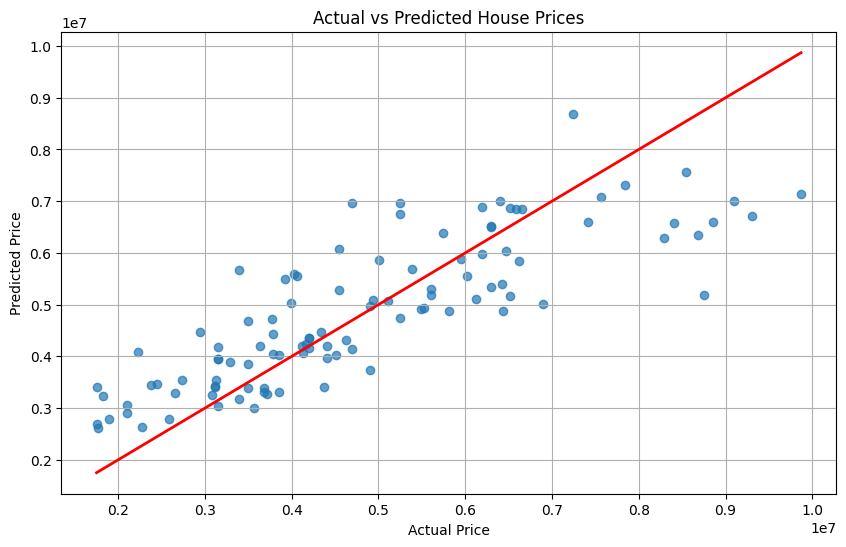

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(predictions_df['Actual Price'], predictions_df['Predicted Price'], alpha=0.7)
plt.plot([predictions_df['Actual Price'].min(), predictions_df['Actual Price'].max()],
         [predictions_df['Actual Price'].min(), predictions_df['Actual Price'].max()], color='red', linewidth=2)  # Line of equality
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid()
plt.show()


In [ ]:
import pandas as pd

# Replace these values with your own inputs
custom_data = {
    'area': [7500],           # Area in square feet
    'bedrooms': [4],          # Number of bedrooms
    'bathrooms': [3],         # Number of bathrooms
    'stories': [2],           # Number of stories
    'mainroad': ['yes'],      # Main road access (yes/no)
    'guestroom': ['no'],      # Guestroom (yes/no)
    'basement': ['no'],       # Basement (yes/no)
    'hotwaterheating': ['yes'],  # Hot water heating (yes/no)
    'airconditioning': ['yes'],   # Air conditioning (yes/no)
    'parking': [2],           # Number of parking spaces
    'prefarea': ['yes'],      # Preferred area (yes/no)
    'furnishingstatus': ['furnished']  # Furnishing status
}

# Create DataFrame
custom_df = pd.DataFrame(custom_data)

# Perform one-hot encoding for categorical variables
custom_df_encoded = pd.get_dummies(custom_df, drop_first=True)

# Ensure the columns match with the training data
custom_df_encoded = custom_df_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict the price using the trained model
predicted_price = model.predict(custom_df_encoded)

# Display the predicted price
print(f"Predicted House Price: {predicted_price[0]:,.2f}")


Predicted House Price: 6,309,290.39
